In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "campania"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,15,Campania,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,15,Campania,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,15,Campania,2,0,2,1,3,3,3,...,0.0,0.0,0.0,1.0,0.00,66.67,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,15,Campania,2,0,2,2,4,1,1,...,0.0,203.0,0.0,1.0,0.00,50.00,0.49,0.00,0.00,33.33
4,2020-02-29T17:00:00,15,Campania,3,0,3,10,13,9,9,...,0.0,160.0,0.0,8.0,0.00,23.08,5.62,0.00,0.00,225.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2021-02-14T17:00:00,15,Campania,1322,111,1433,67561,68994,910,1603,...,7.0,19987.0,14001.0,937.0,7.75,2.08,8.02,11.45,6.73,1.34
356,2021-02-15T17:00:00,15,Campania,1281,107,1388,67668,69056,62,966,...,16.0,9509.0,6562.0,107.0,7.71,2.01,10.16,14.72,-3.60,0.09
357,2021-02-16T17:00:00,15,Campania,1284,106,1390,67590,68980,-76,1135,...,17.0,14156.0,6498.0,-78.0,7.63,2.02,8.02,17.47,-0.93,-0.11
358,2021-02-17T17:00:00,15,Campania,1301,107,1408,68271,69679,699,1575,...,14.0,20469.0,12452.0,681.0,7.60,2.02,7.69,12.65,0.94,1.01


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 18, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1573
Nuovi tamponi: 19886.0
Percentuale nuovi positivi/nuovi tamponi: 7.9 %
Nuovi guariti: 2041.0
Nuovi deceduti: 29.0
Variazione positivi ricoverati con sintomi: -11.0
Variazione positivi in terapia intensiva: 3.0
Variazione positivi in isolamento dimiciliare: -489.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 18, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-20T17:00:00,15,Campania,1554,119,1673,82293,83966,-224,891,...,11.0,14109.0,12681.0,-177.0,7.11,1.99,6.32,7.03,-2.46,-0.27
1,2020-12-21T17:00:00,15,Campania,1571,120,1691,81841,83532,-434,691,...,28.0,9662.0,7692.0,-452.0,7.10,2.02,7.15,8.98,0.84,-0.52
2,2020-12-22T17:00:00,15,Campania,1529,118,1647,79612,81259,-2273,791,...,25.0,10185.0,979.0,-2229.0,7.16,2.03,7.77,80.80,-1.67,-2.72
3,2020-12-23T17:00:00,15,Campania,1513,107,1620,78327,79947,-1312,1067,...,19.0,18426.0,4672.0,-1285.0,6.60,2.03,5.79,22.84,-9.32,-1.61
4,2020-12-24T17:00:00,15,Campania,1488,102,1590,78419,80009,62,1156,...,20.0,20404.0,13612.0,92.0,6.42,1.99,5.67,8.49,-4.67,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-02-14T17:00:00,15,Campania,1322,111,1433,67561,68994,910,1603,...,7.0,19987.0,14001.0,937.0,7.75,2.08,8.02,11.45,6.73,1.34
57,2021-02-15T17:00:00,15,Campania,1281,107,1388,67668,69056,62,966,...,16.0,9509.0,6562.0,107.0,7.71,2.01,10.16,14.72,-3.60,0.09
58,2021-02-16T17:00:00,15,Campania,1284,106,1390,67590,68980,-76,1135,...,17.0,14156.0,6498.0,-78.0,7.63,2.02,8.02,17.47,-0.93,-0.11
59,2021-02-17T17:00:00,15,Campania,1301,107,1408,68271,69679,699,1575,...,14.0,20469.0,12452.0,681.0,7.60,2.02,7.69,12.65,0.94,1.01


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

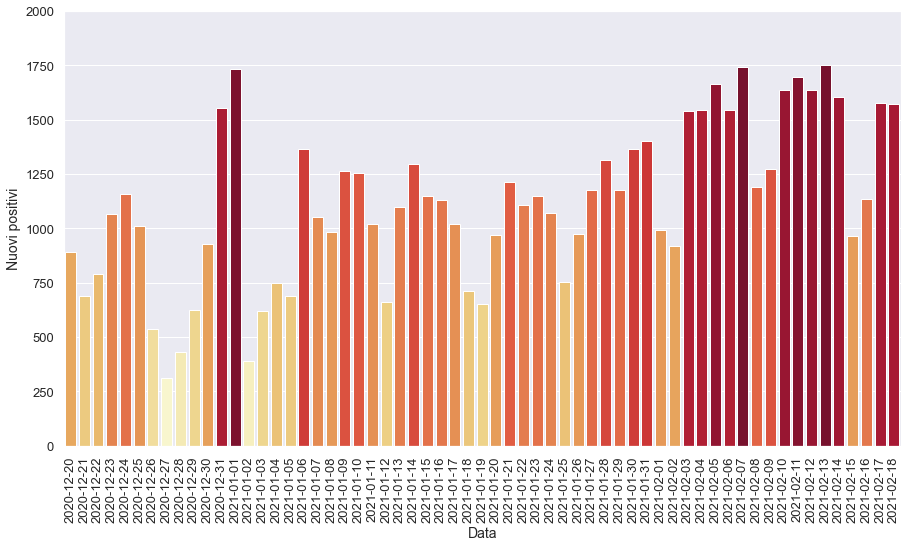

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

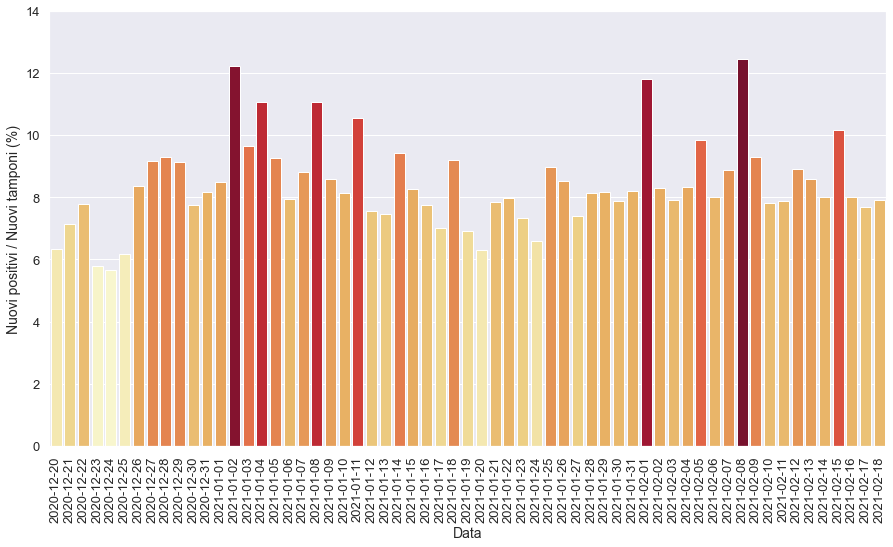

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

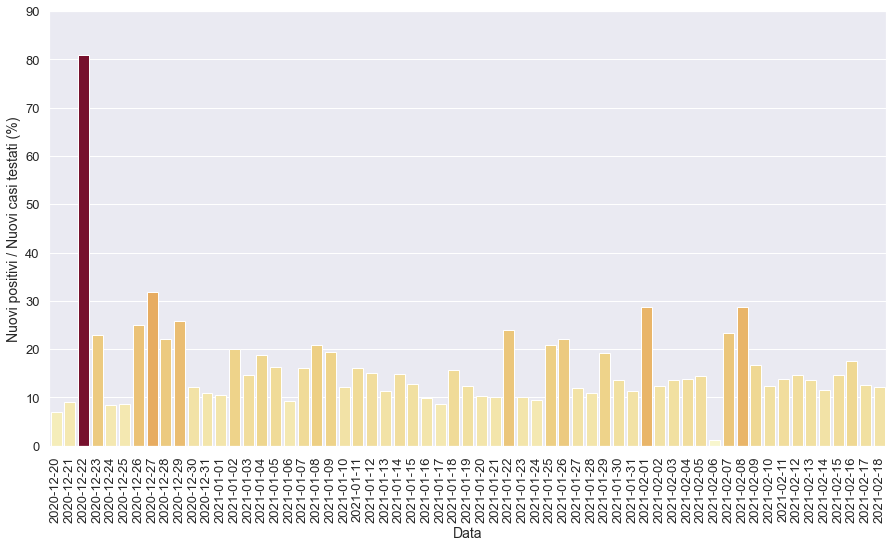

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

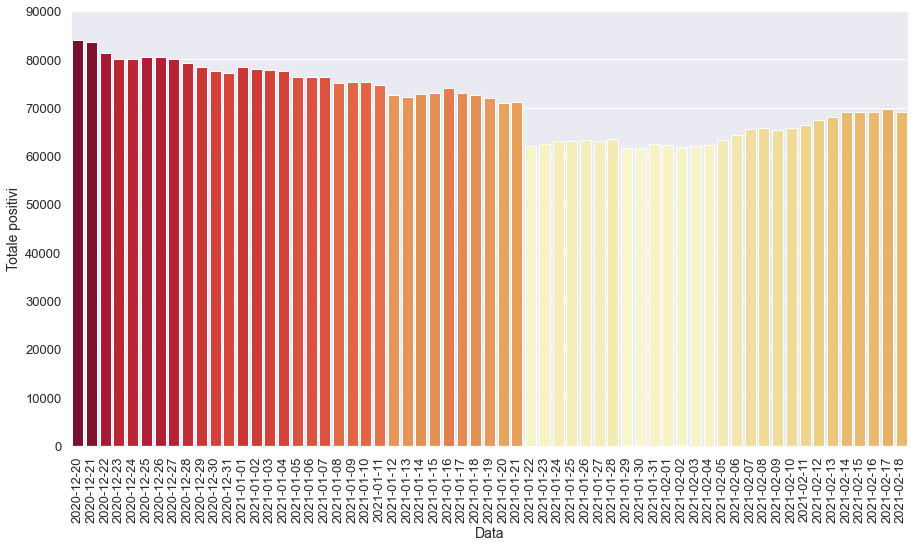

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

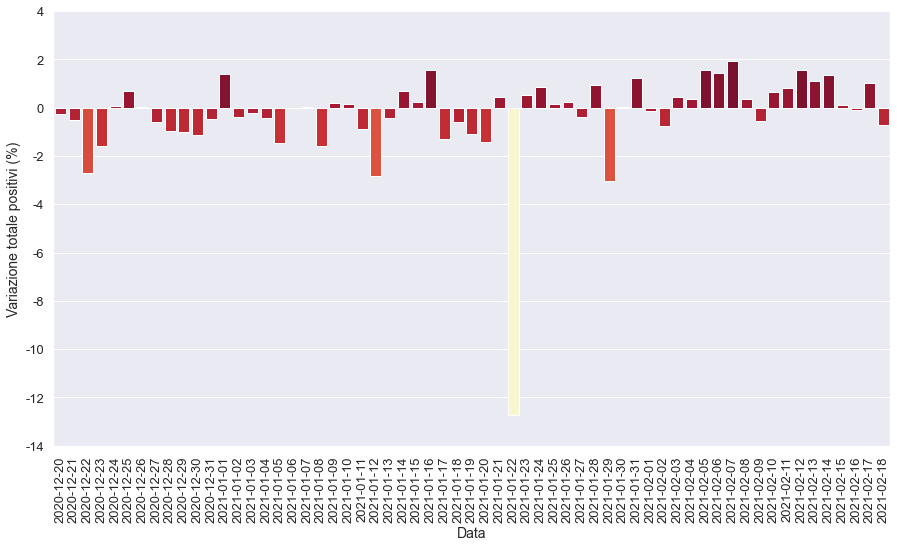

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

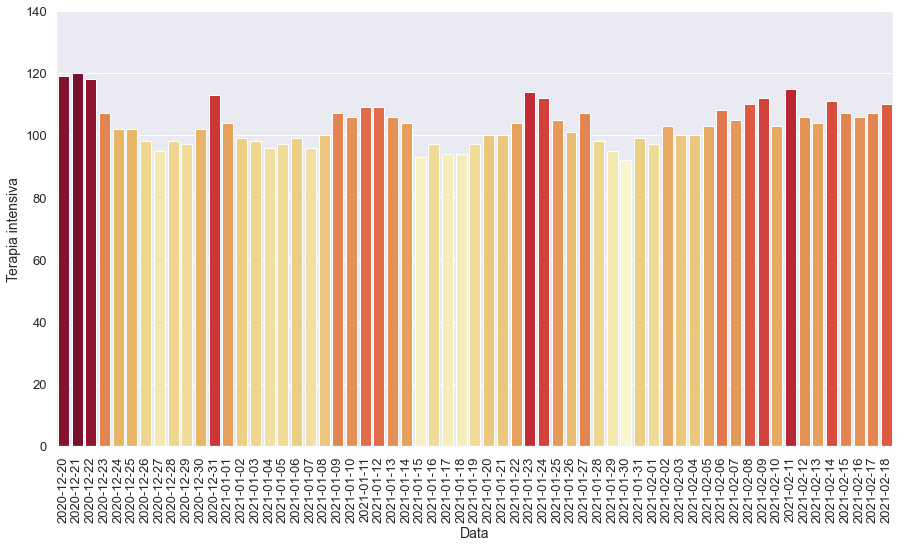

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

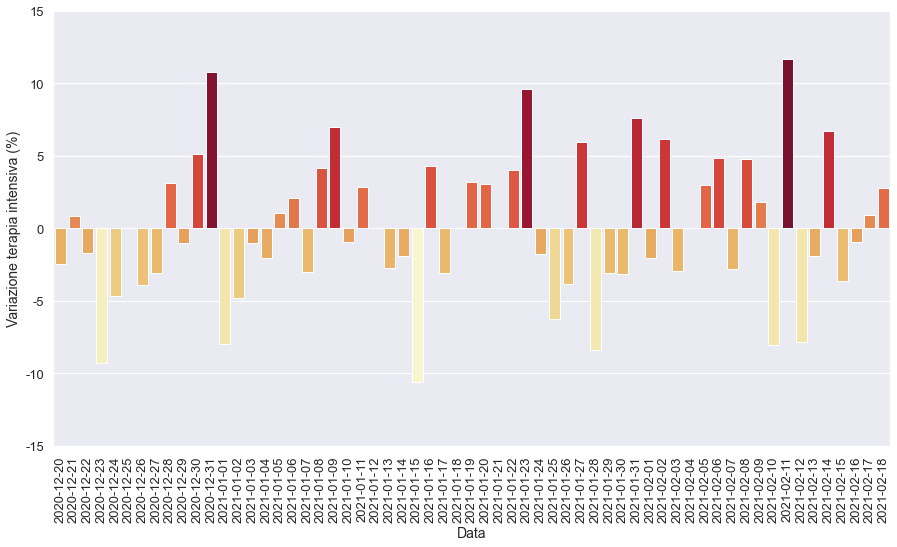

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

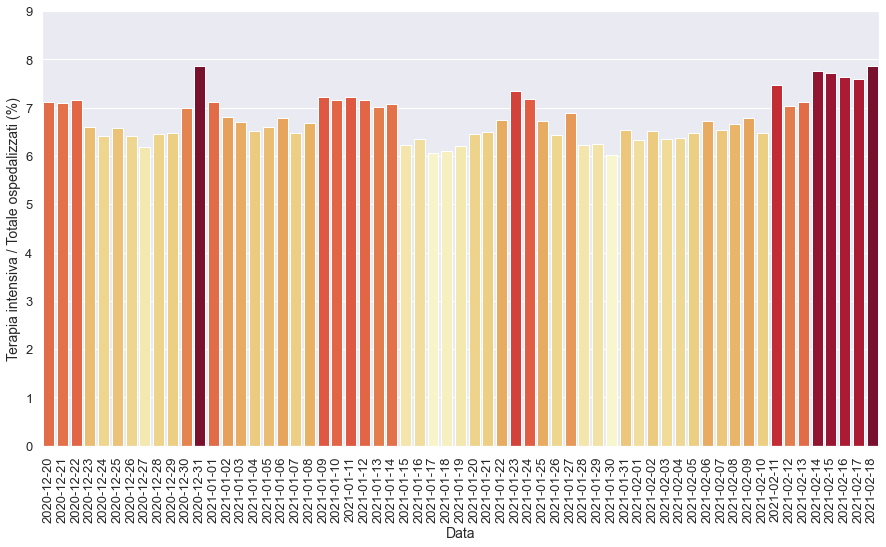

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

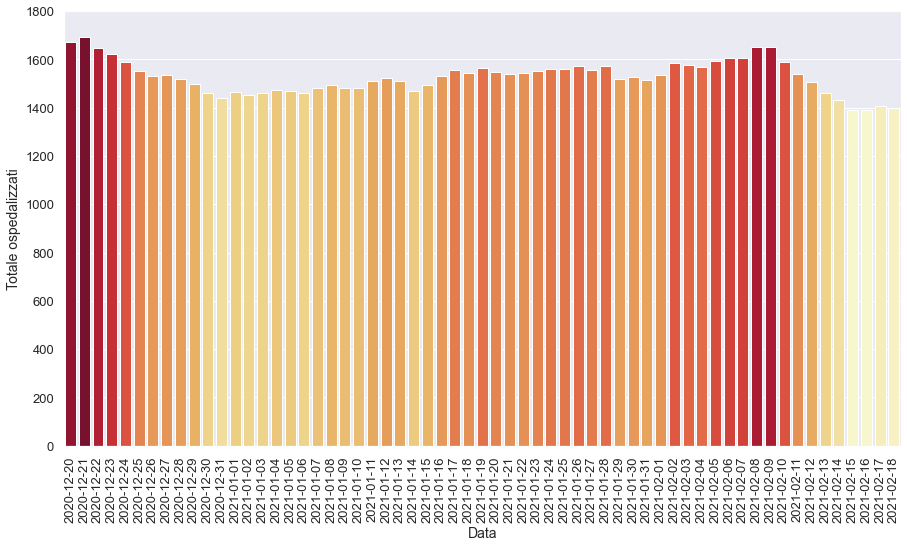

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

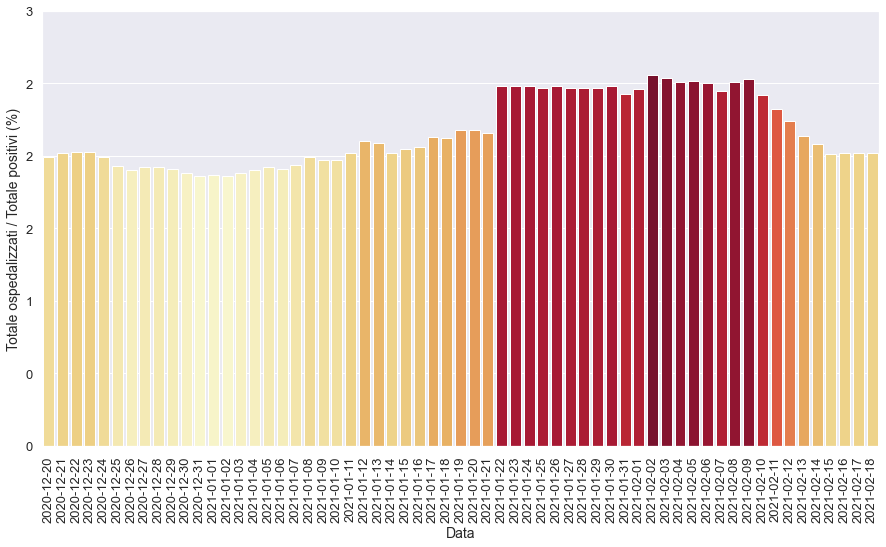

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

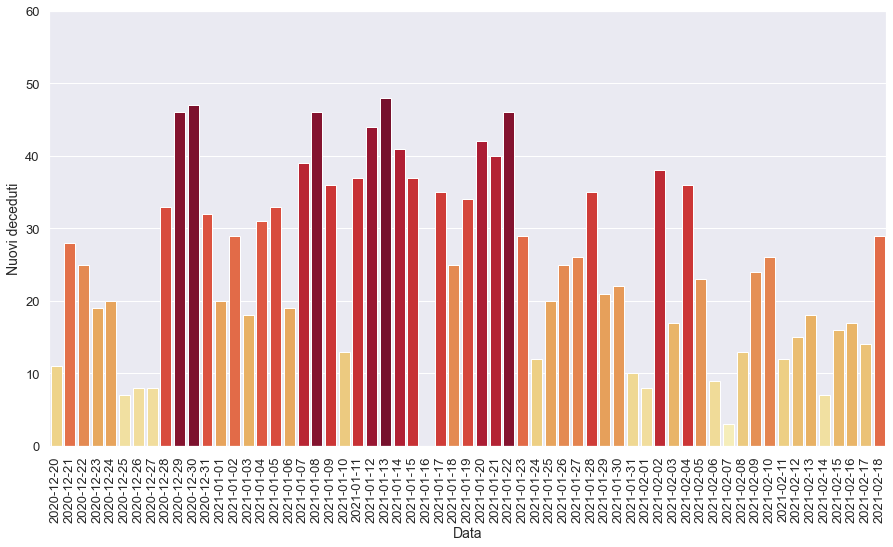

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

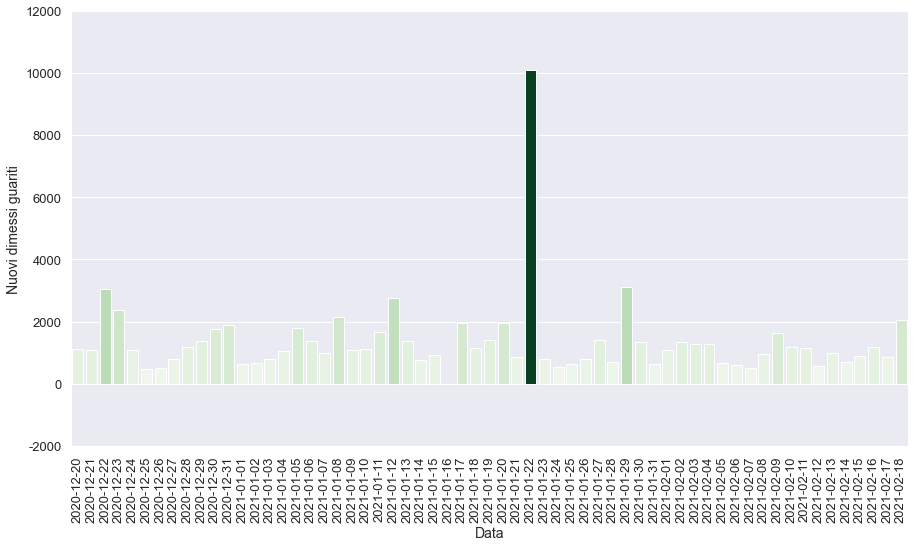

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-19T17:00:00,15,Campania,1468,97,1565,70315,71880,-782,651,...,34.0,9441.0,5231.0,-805.0,6.20,2.18,6.90,12.45,3.19,-1.08
1,2021-01-20T17:00:00,15,Campania,1448,100,1548,69318,70866,-1014,968,...,42.0,15343.0,9468.0,-997.0,6.46,2.18,6.31,10.22,3.09,-1.41
2,2021-01-21T17:00:00,15,Campania,1440,100,1540,69638,71178,312,1215,...,40.0,15473.0,11924.0,320.0,6.49,2.16,7.85,10.19,0.00,0.44
3,2021-01-22T17:00:00,15,Campania,1438,104,1542,60591,62133,-9045,1106,...,46.0,13834.0,4596.0,-9047.0,6.74,2.48,7.99,24.06,4.00,-12.71
4,2021-01-23T17:00:00,15,Campania,1437,114,1551,60902,62453,320,1150,...,29.0,15663.0,11457.0,311.0,7.35,2.48,7.34,10.04,9.62,0.52
5,2021-01-24T17:00:00,15,Campania,1448,112,1560,61425,62985,532,1069,...,12.0,16219.0,11223.0,523.0,7.18,2.48,6.59,9.53,-1.75,0.85
6,2021-01-25T17:00:00,15,Campania,1455,105,1560,61513,63073,88,754,...,20.0,8384.0,3621.0,88.0,6.73,2.47,8.99,20.82,-6.25,0.14
7,2021-01-26T17:00:00,15,Campania,1470,101,1571,61662,63233,160,976,...,25.0,11441.0,4419.0,149.0,6.43,2.48,8.53,22.09,-3.81,0.25
8,2021-01-27T17:00:00,15,Campania,1447,107,1554,61441,62995,-238,1178,...,26.0,15933.0,9877.0,-221.0,6.89,2.47,7.39,11.93,5.94,-0.38
9,2021-01-28T17:00:00,15,Campania,1474,98,1572,62017,63589,594,1313,...,35.0,16112.0,12002.0,576.0,6.23,2.47,8.15,10.94,-8.41,0.94


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

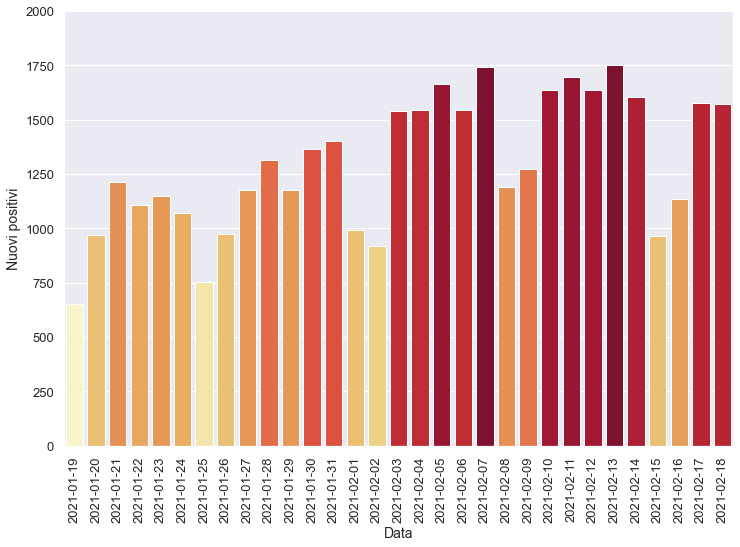

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

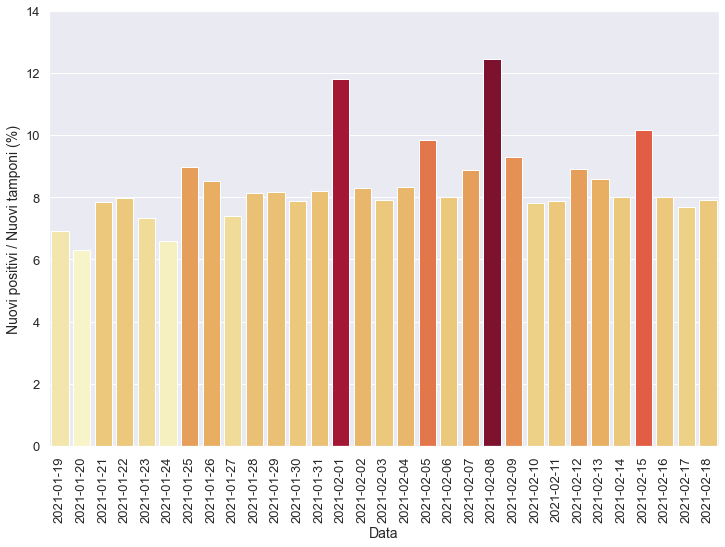

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

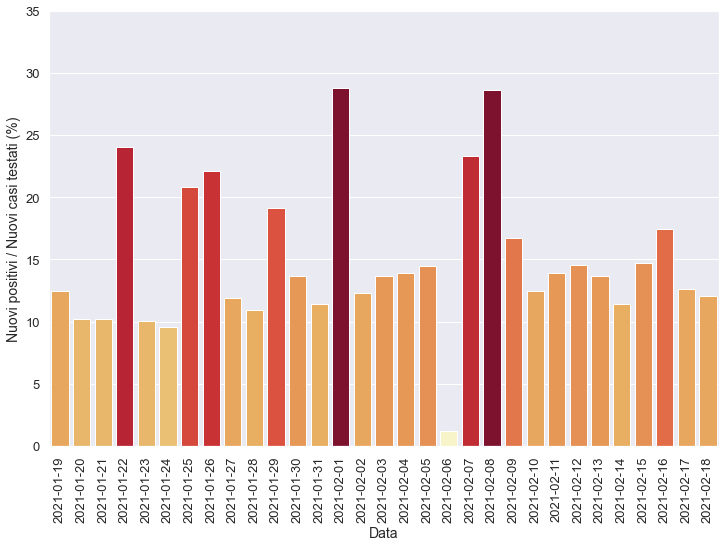

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

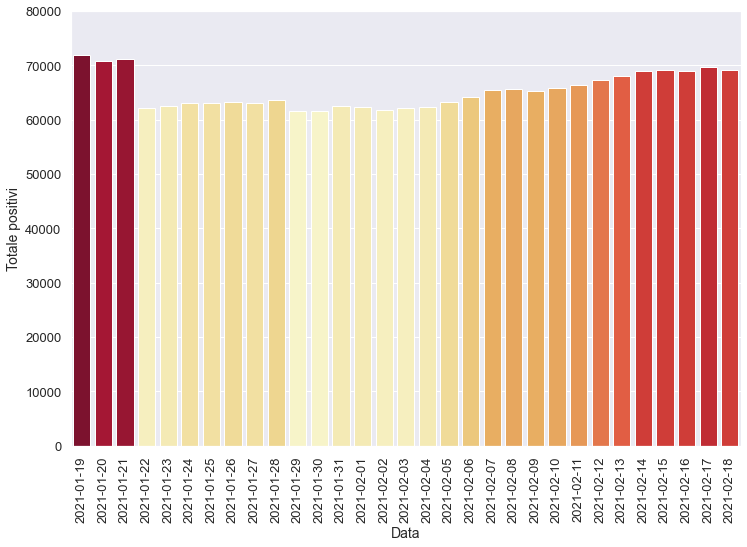

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

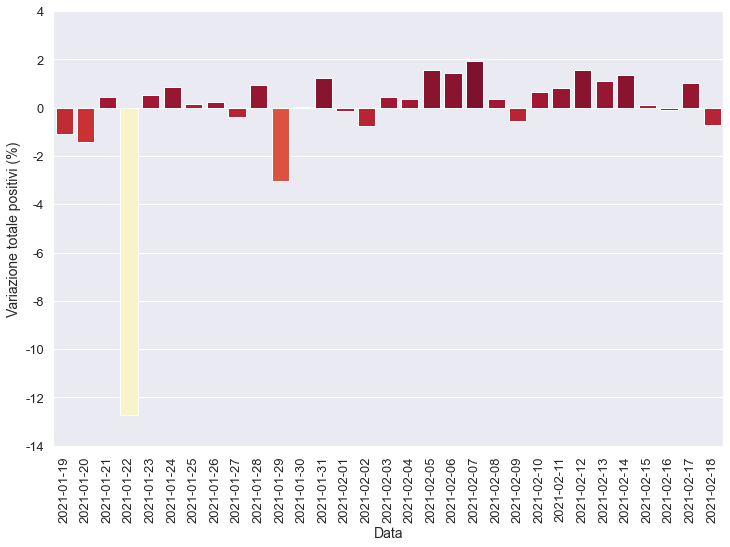

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

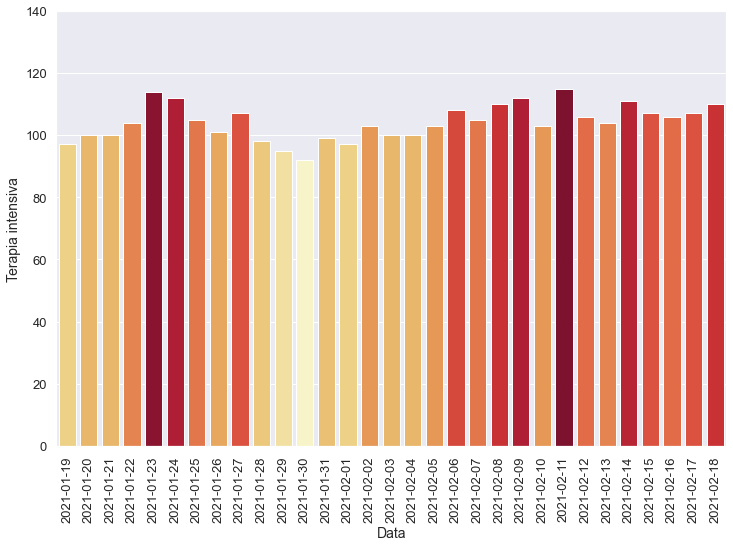

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

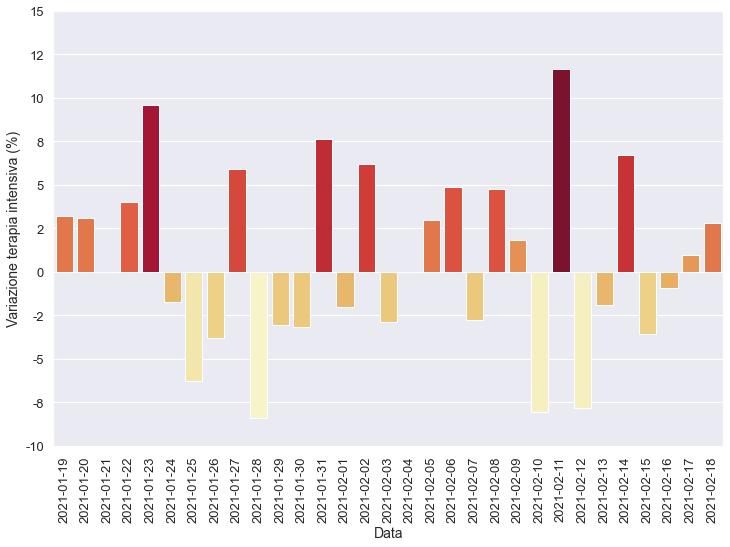

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

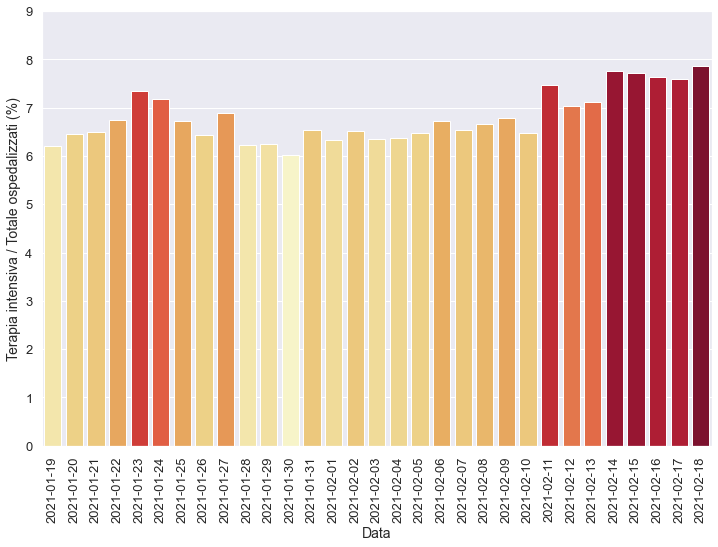

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

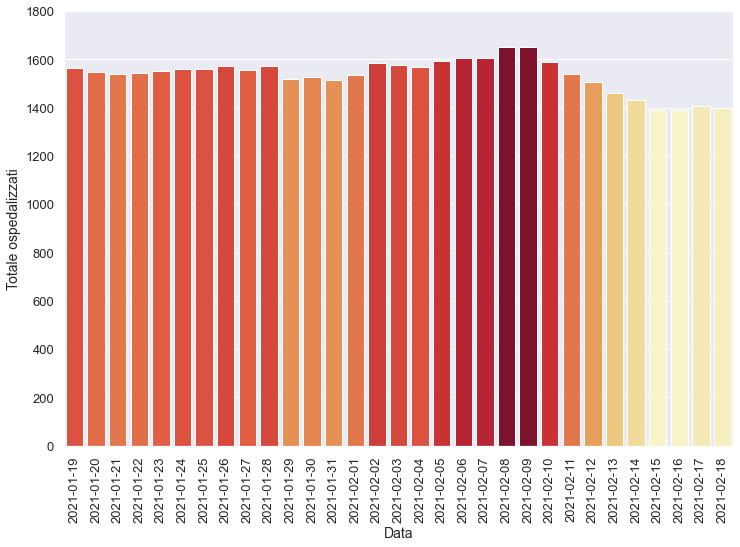

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

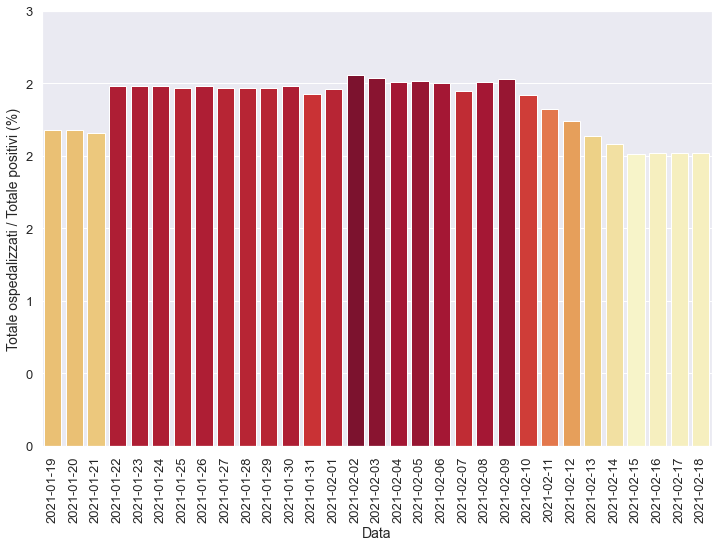

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

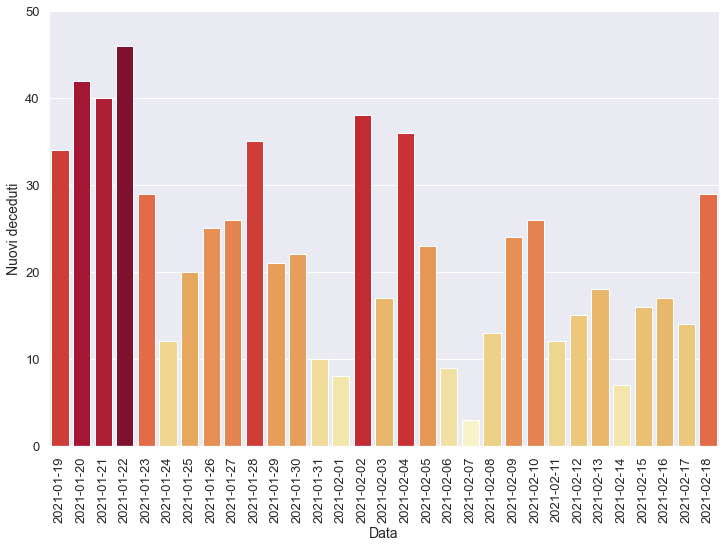

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

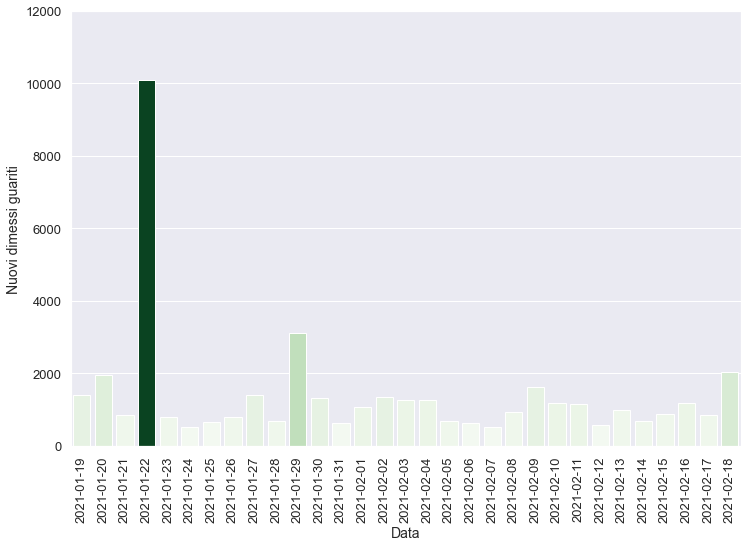

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-11T17:00:00,15,Campania,1425,115,1540,64753,66293,542,1694,...,12.0,21458.0,12214.0,591.0,7.47,2.32,7.89,13.87,11.65,0.82
1,2021-02-12T17:00:00,15,Campania,1399,106,1505,65827,67332,1039,1637,...,15.0,18393.0,11241.0,1074.0,7.04,2.24,8.90,14.56,-7.83,1.57
2,2021-02-13T17:00:00,15,Campania,1356,104,1460,66624,68084,752,1751,...,18.0,20413.0,12802.0,797.0,7.12,2.14,8.58,13.68,-1.89,1.12
3,2021-02-14T17:00:00,15,Campania,1322,111,1433,67561,68994,910,1603,...,7.0,19987.0,14001.0,937.0,7.75,2.08,8.02,11.45,6.73,1.34
4,2021-02-15T17:00:00,15,Campania,1281,107,1388,67668,69056,62,966,...,16.0,9509.0,6562.0,107.0,7.71,2.01,10.16,14.72,-3.60,0.09
5,2021-02-16T17:00:00,15,Campania,1284,106,1390,67590,68980,-76,1135,...,17.0,14156.0,6498.0,-78.0,7.63,2.02,8.02,17.47,-0.93,-0.11
6,2021-02-17T17:00:00,15,Campania,1301,107,1408,68271,69679,699,1575,...,14.0,20469.0,12452.0,681.0,7.60,2.02,7.69,12.65,0.94,1.01
7,2021-02-18T17:00:00,15,Campania,1290,110,1400,67782,69182,-497,1573,...,29.0,19886.0,13007.0,-489.0,7.86,2.02,7.91,12.09,2.80,-0.71


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

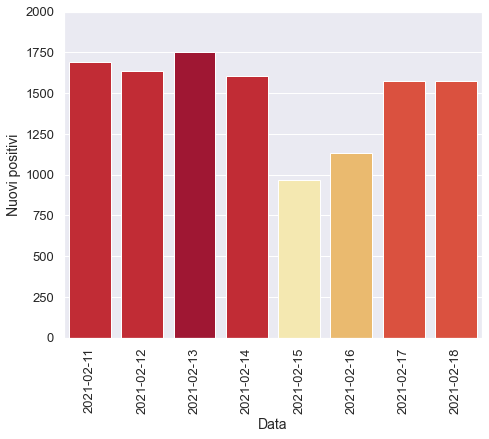

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

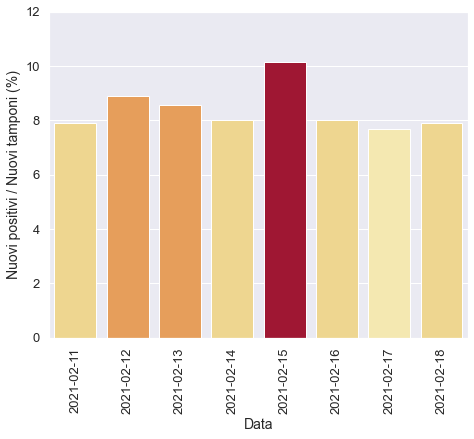

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

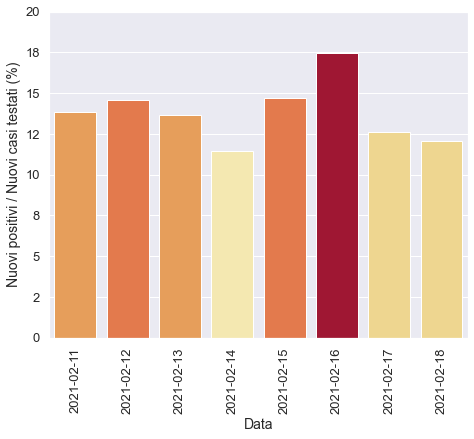

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

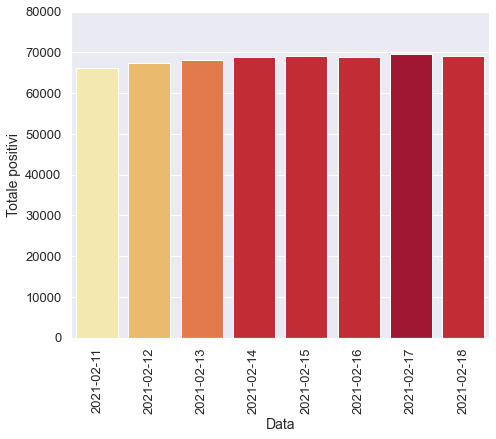

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

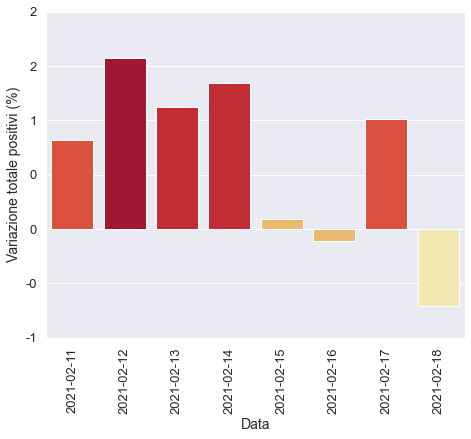

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

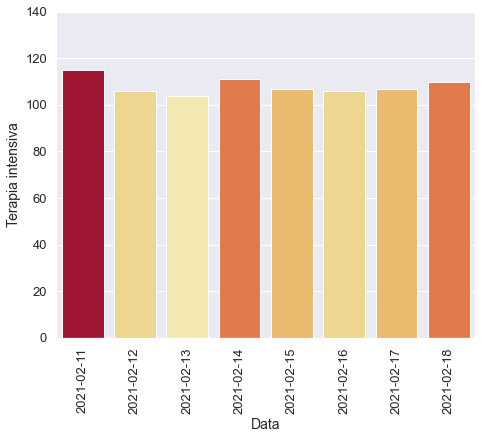

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

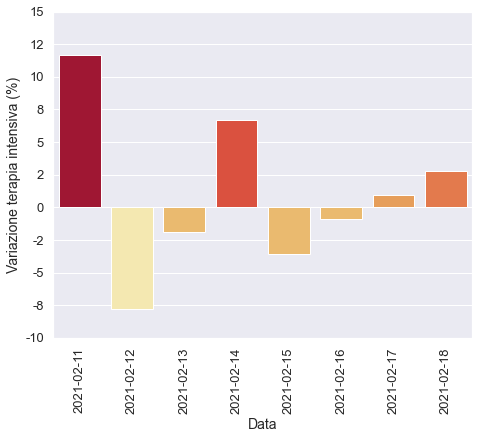

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

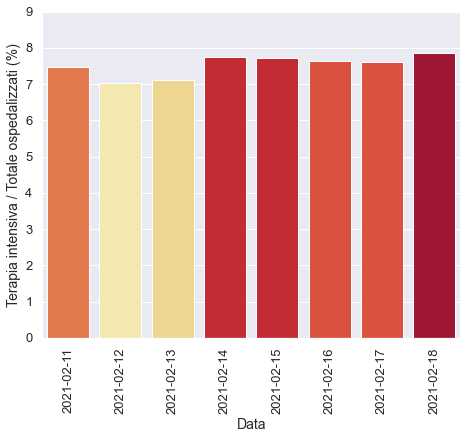

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

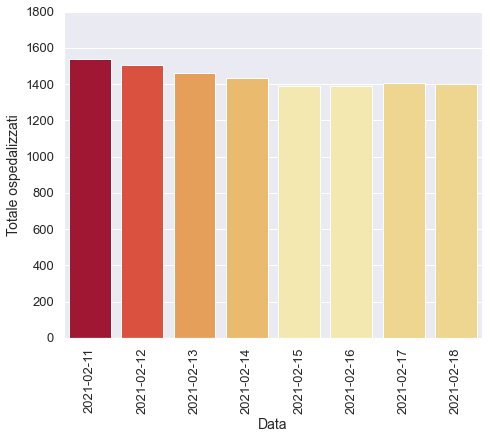

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

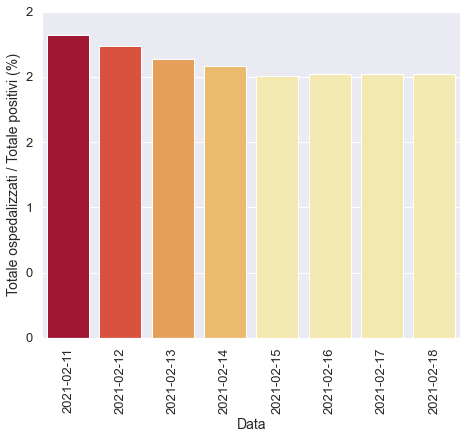

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

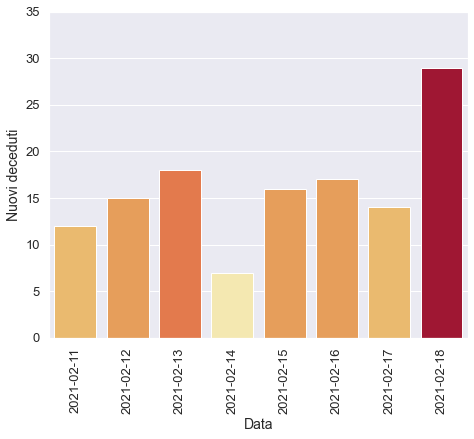

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

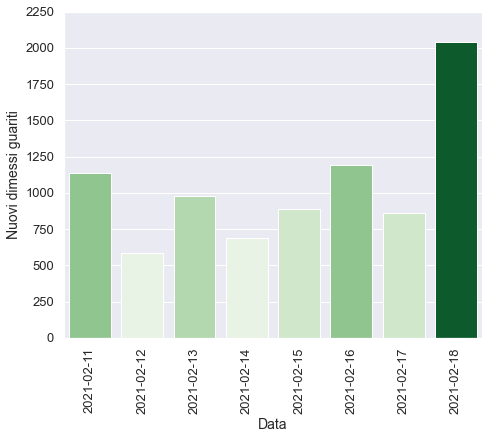

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)